In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
image_size=256
batch_size = 20
channels = 3

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('archive',shuffle=True,image_size=(image_size,image_size), batch_size=batch_size)




Found 2750 files belonging to 5 classes.


In [3]:
classes_name =  dataset.class_names
classes_name

['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']

In [4]:
len(dataset)

138

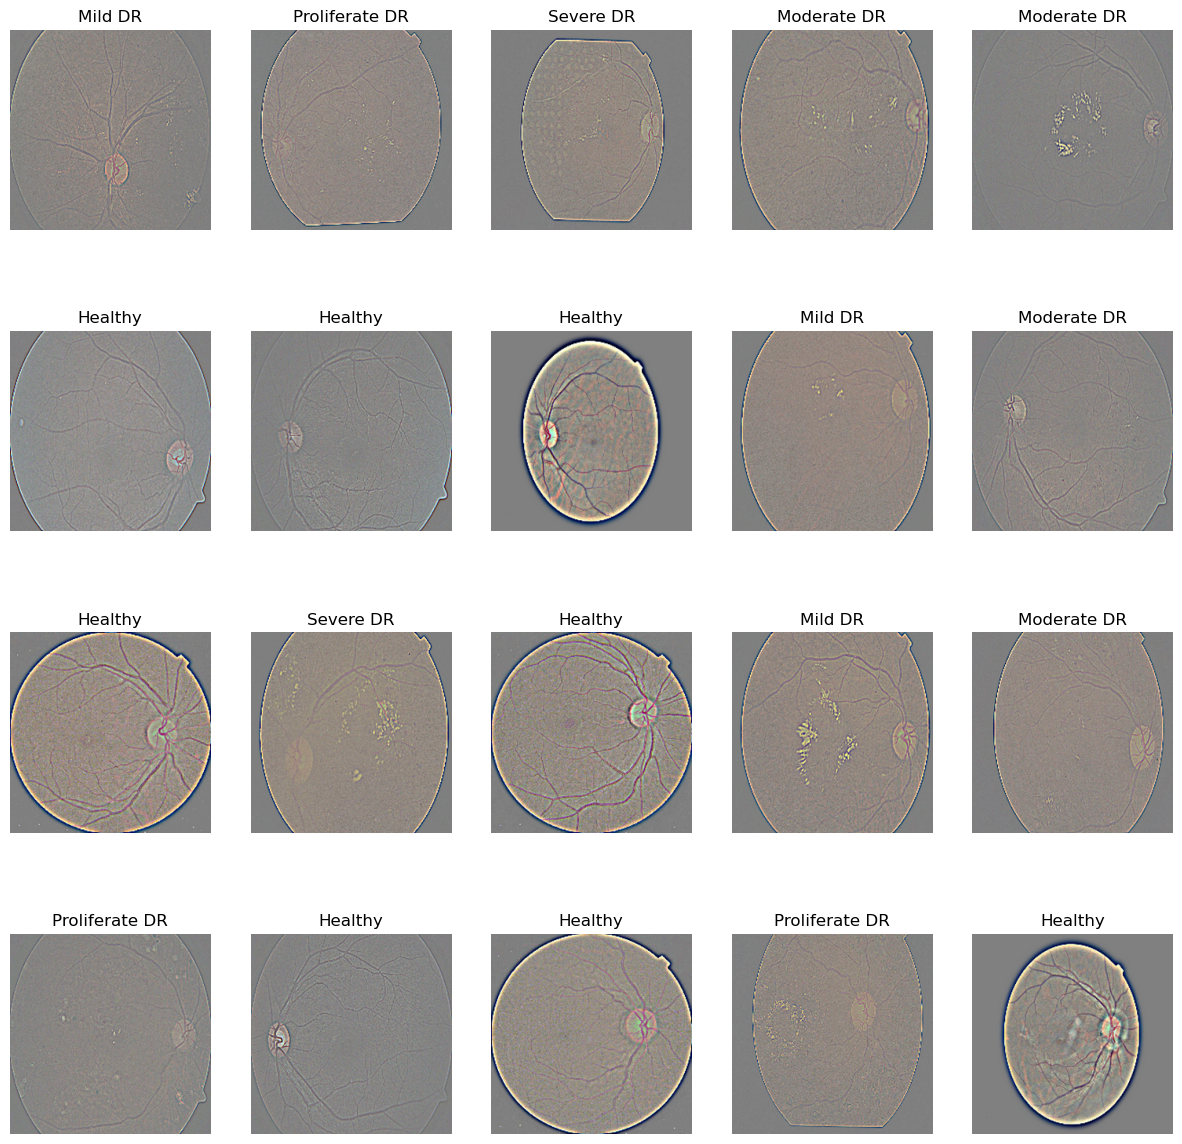

In [5]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(0,20):
        ax=plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes_name[label_batch[i]])
        plt.axis('off')

In [6]:
len(dataset)

138

In [7]:
train_size=0.8
len(dataset)*train_size

110.4

In [8]:
train_data = dataset.take(110)

In [9]:
len(train_data)

110

In [10]:
test_data = dataset.skip(110)
len(test_data)

28

In [11]:
val_size = 0.1
len(dataset)*val_size

13.8

In [12]:
test_data = test_data.skip(13)
len(test_data)

15

In [13]:
def get_dataset_preparation_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    # Calculate the total size of the dataset
    ds_size = len(ds)
    
    # Shuffle the dataset if required
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    # Calculate the sizes of training, validation, and test sets
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    
    # Split the dataset into training, validation, and test sets
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)
    
    # Return the datasets
    return train_ds, val_ds, test_ds


In [14]:
train_ds,val_ds,test_ds = get_dataset_preparation_tf(dataset)

In [15]:
len(train_ds)

110

In [16]:
len(val_ds)

13

In [17]:
len(test_ds)

13

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
resize_and_rescale =  tf.keras.Sequential([
    layers.Rescaling(image_size,image_size),
    layers.Rescaling(1.0/255)])

In [20]:
resize_and_rescale


<Sequential name=sequential, built=False>

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(" Horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define the input shape of your images
input_shape = (image_size, image_size, channels)  # Update these values with your actual image dimensions

# Define the number of classes (severity levels of diabetic retinopathy)
num_classes = 5  # Update this with the number of severity levels in your dataset

# Create an instance of the model
model = create_model(input_shape, channels)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Optionally, print a summary of the model architecture
model.summary()


C:\Users\jayesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,742,979 (14.28 MB)

 Trainable params: 3,742,979 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras import layers, models
num_epochs=30
# Define your model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    # Add more layers as needed
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')  # Assuming you have 'num_classes' output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Using SparseCategoricalCrossentropy
              metrics=['accuracy'])

# Assuming you have `train_ds`, `val_ds`, and `test_ds` datasets prepared using your function
train_ds, val_ds, test_ds = get_dataset_preparation_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=num_epochs)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)


Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 34s 245ms/step - accuracy: 0.4537 - loss: 1800.6218 - val_accuracy: 0.5885 - val_loss: 2.8256
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 28s 236ms/step - accuracy: 0.6406 - loss: 3.4442 - val_accuracy: 0.6538 - val_loss: 1.5716
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 25s 211ms/step - accuracy: 0.6781 - loss: 2.4359 - val_accuracy: 0.7538 - val_loss: 1.4653
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 267ms/step - accuracy: 0.7173 - loss: 1.8618 - val_accuracy: 0.7154 - val_loss: 1.8891
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 34s 279ms/step - accuracy: 0.7499 - loss: 1.4187 - val_accuracy: 0.7462 - val_loss: 1.4079
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 216ms/step - accuracy: 0.7780 - loss: 1.0082 - val_accuracy: 0.7808 - val_loss: 1.7177
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 25s 219ms/step - accuracy: 0.7614 - loss: 1.3358 - val_accuracy: 0.8769 - val_loss: 0.6725
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 26s 216ms/step - accuracy: 0.8242 - loss

In [24]:
score = model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8451 - loss: 0.8676


In [25]:
score


[0.953353762626648, 0.8461538553237915]

In [26]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 110}

In [27]:
history.history.keys()
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =history.history['loss']
val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

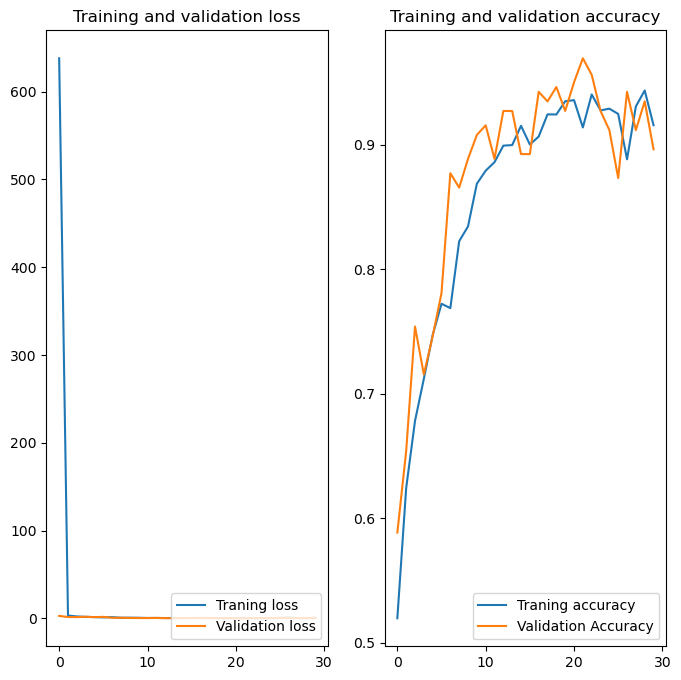

In [29]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),loss,label = "Traning loss")
plt.plot(range(num_epochs),val_loss,label="Validation loss")
plt.legend(loc="lower right")
plt.title("Training and validation loss")

plt.subplot(1,2,2)
plt.plot(range(num_epochs),acc,label = "Traning accuracy")
plt.plot(range(num_epochs),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation accuracy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
predicted label: Healthy


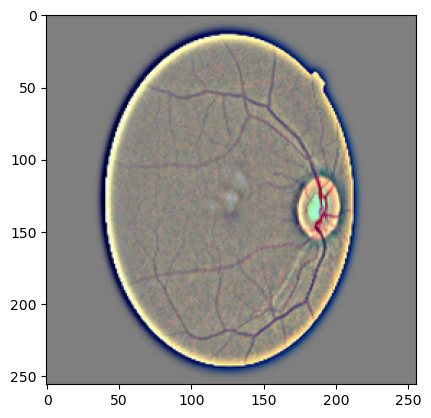

In [30]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    plt.imshow(first_image)
    #print(classes_name[first_label])
    batch_prediction = model.predict(image_batch)
    print("predicted label:",classes_name[np.argmax(batch_prediction[0])]) #argmax gives index

In [31]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #creat a batch
    prediction = model.predict(img_array)
    predicted_class = classes_name[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
{actual_class}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
{actual

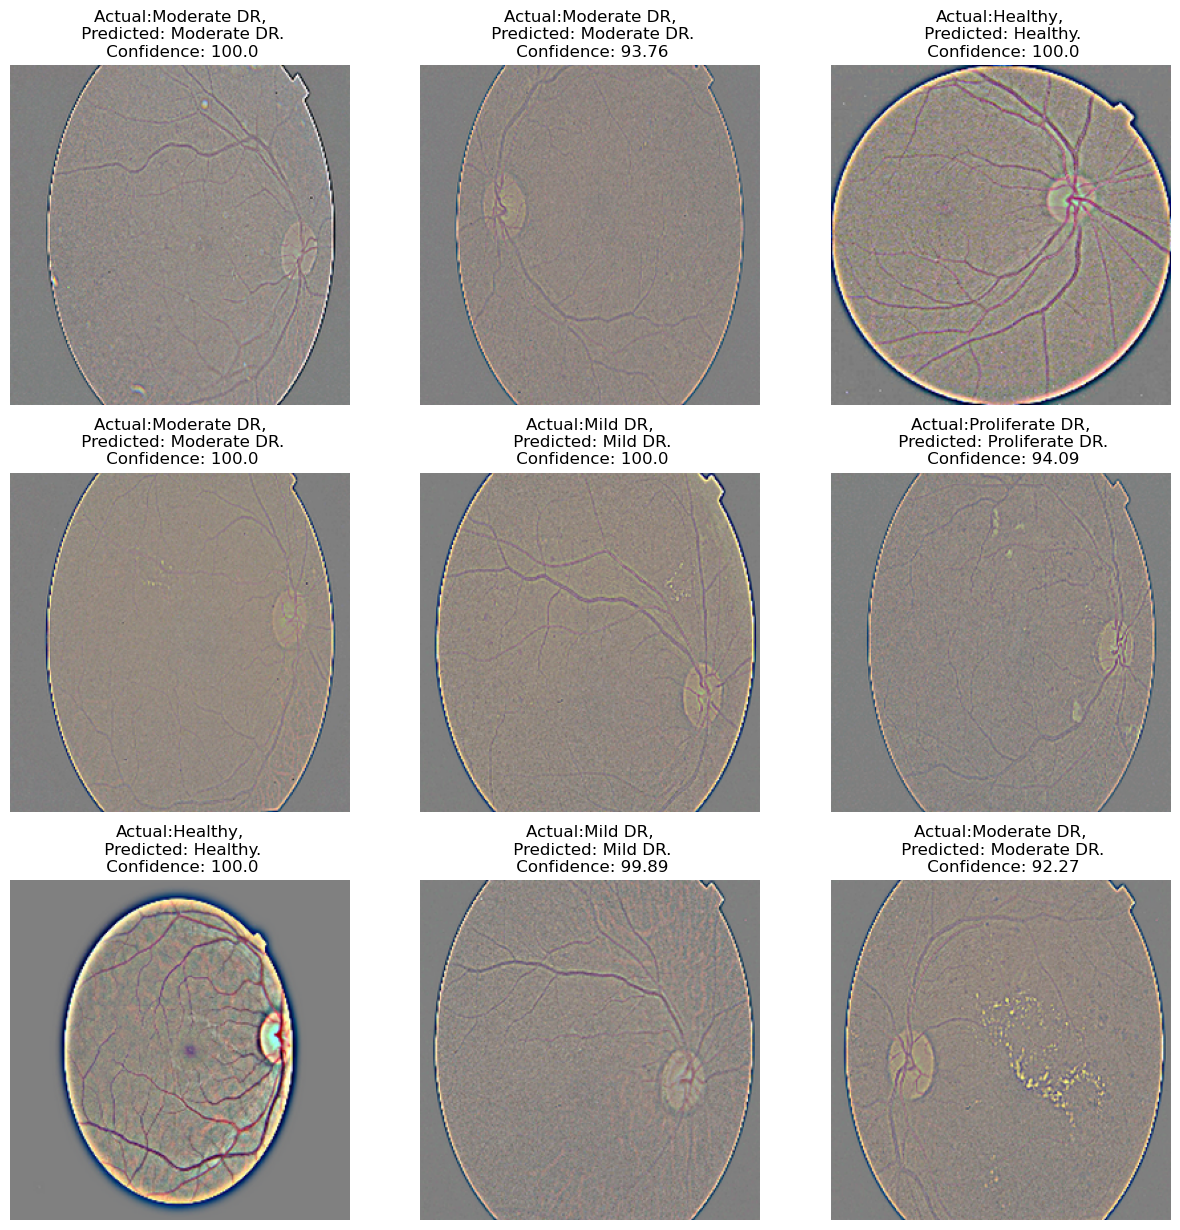

In [32]:
plt.figure(figsize = (15,15))
for images,labels in  test_ds.take(5):
    for i in  range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = classes_name[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}")
        print("{actual_class}")
        plt.axis("off")

In [75]:
import tensorflow as tf

# Assume you have a trained Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(100,)),
    tf.keras.layers.Dense(1)
])

# Save the model in H5 format
model.save("CNN2.h5")
print("Model saved as 'model.h5'")


C:\Users\jayesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model saved as 'model.h5'
